<a href="https://colab.research.google.com/github/BakrAsskali/AE-VAE-GANs/blob/main/AE_and_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.model_selection import ParameterGrid

In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()
# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

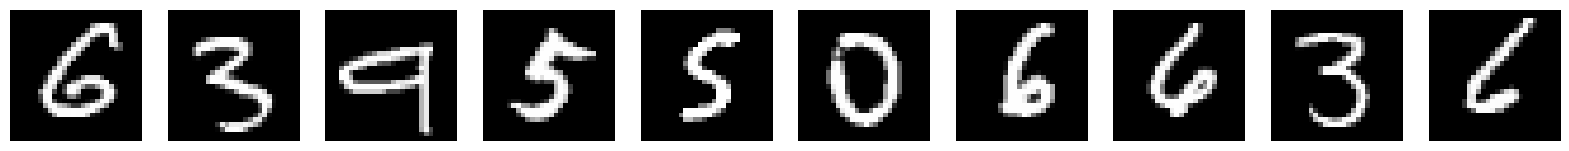

In [ ]:
data, _ = next(iter(loader))
# plot the first 10 images
fig, axes = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 2))
for i, ax in enumerate(axes):
    ax.imshow(data[i].view(28, 28).numpy(), cmap = "gray")
    ax.axis("off")
plt.show()

In [ ]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# use grid search to find the best hyperparameters for the model
grid_search = {
    "learning_rate": [0.001, 0.01, 0.1],
    "batch_size": [32, 64, 128],
    "epochs": [10, 20, 30]
}
# create a list of hyperparameters
hyperparameters = list(ParameterGrid(grid_search))
# create a list of all possible combinations of hyperparameters
combinations = list(itertools.product(hyperparameters, repeat = 1))

In [ ]:
# create a list to store the loss values
loss_values = []
# loop through all the combinations of hyperparameters
for combination in combinations:
    # create a model
    model = AE()
    # create a loss function
    criterion = torch.nn.MSELoss()
    # create an optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr = combination[0]["learning_rate"])
    # loop through the number of epochs
    for epoch in range(combination[0]["epochs"]):
        # create a list to store the losses
        losses = []
        # loop through the data loader
        for batch_features, _ in loader:
            # reshape the data
            batch_features = batch_features.view(-1, 28 * 28)
            # set the gradients to zero
            optimizer.zero_grad()
            # forward pass
            outputs = model(batch_features)
            # calculate the loss
            loss = criterion(outputs, batch_features)
            # backward pass
            loss.backward()
            # update the weights
            optimizer.step()
            # append the loss
            losses.append(loss.item())
        # print the loss
        print(f"Epoch {epoch + 1}, loss: {np.mean(losses)}")
    # append the loss values
    loss_values.append(np.mean(losses))

KeyboardInterrupt: 

In [ ]:
# find the best hyperparameters
best_hyperparameters = hyperparameters[np.argmin(loss_values)]
# print the best hyperparameters
print(best_hyperparameters)

In [ ]:
# create a model
model = AE()
# create a loss function
criterion = torch.nn.MSELoss()
# create an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# create a list to store the losses
losses = []
outputs = []
# loop through the number of epochs
for epoch in range(30):
  for (image, _) in loader:
    image = image.reshape(-1, 28*28)
    reconstructed = model(image)
    loss = criterion(reconstructed, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    outputs.append((30, image, reconstructed))
    print("Epoch :",epoch,"Loss====>",loss)

In [ ]:
#Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
with torch.no_grad():
  plt.plot(losses[-100:])


In [ ]:
with torch.no_grad():
  for i, item in enumerate(image):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])
    plt.show()